In [2]:
%pip install pandas
%pip install request
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
mnist = fetch_openml('mnist_784', version=1)

##### Key Features of the MNIST Dataset
- Content: The dataset contains images of handwritten digits from 0 to 9.
- Number of Samples: It consists of 70,000 images in total, with 60,000 images in the training set and 10,000 images in the test set.
- Image Size: Each image is a grayscale image of size 28x28 pixels.
- Labels: Each image is labeled with the corresponding digit (0-9) that it represents.

In [5]:
X = mnist['data'].values
y = mnist['target'].values.astype(int)

In [6]:
mnist['data'].head(11)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("Dataset Shape (X):", X.shape)
print("Dataset Shape (y):", y.shape)

# Display a few images from the datasetprint("Unique target labels (digits):", np.unique(y))

Dataset Shape (X): (70000, 784)
Dataset Shape (y): (70000,)


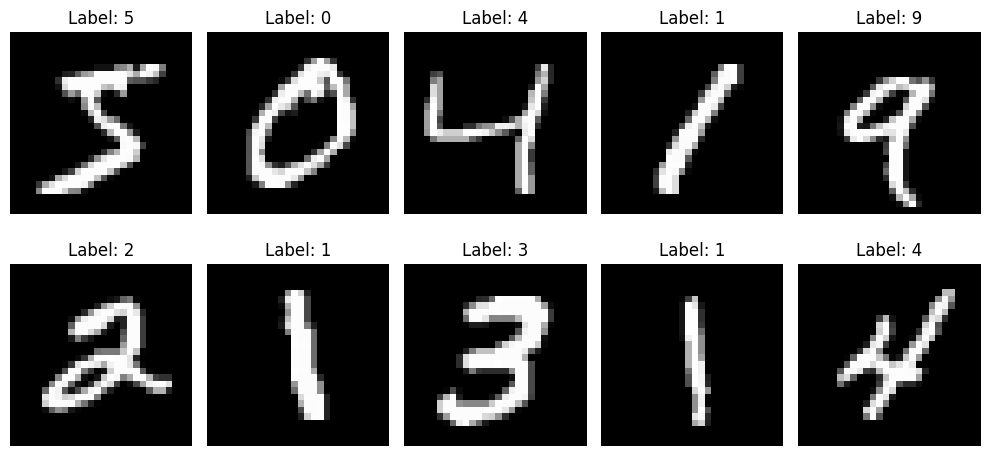

In [8]:
# Display a few images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, index in zip(axes.ravel(), range(10)):
    ax.imshow(X[index].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y[index]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Explanation:
We load the MNIST dataset, which consists of 784-dimensional vectors for each 28x28 pixel image, and the target labels (0 to 9, indicating the digits).
We visualize a few sample images from the dataset along with their labels to better understand the data.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
# Normalize the pixel values (scale between 0 and 1)
X_scaled = X / 255.0

##### Scaling the Data

Scaling is an important preprocessing step in machine learning, especially when dealing with features that have different ranges. In the context of the MNIST dataset, the pixel values of the images range from 0 to 255. To ensure that all features contribute equally to the model, we scale the pixel values to a range between 0 and 1.

This is done by dividing each pixel value by 255.0, which is the maximum possible pixel value. This normalization helps in speeding up the convergence of the learning algorithm and can also improve the performance of the model.

In [11]:
#Reduce dimensionality with PCA (helps for faster training and reduced overfitting)

pca = PCA(n_components=50)  # Reduce to 50 components (adjust based on your dataset)
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (56000, 50)
Test set size: (14000, 50)


Explanation:
Normalization: We scale the image pixel values between 0 and 1 (since the pixel values are originally between 0 and 255).
PCA: Principal Component Analysis (PCA) is applied to reduce the dimensionality from 784 to 50 components. This can help speed up training and prevent overfitting, though it’s optional based on the model and dataset.
Train-Test Split: We split the dataset into training and testing sets (80% for training, 20% for testing).

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GaussianNB()

In [15]:
# Create the VotingClassifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft',  # Soft voting (use predicted probabilities)
    weights=[2, 1, 1]  # linear regression gets more weight
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gnb', GaussianNB())],
                 voting='soft', weights=[2, 1, 1])

Explanation:
Individual Classifiers: We use Logistic Regression, Random Forest, and Gaussian Naive Bayes as our individual classifiers.
VotingClassifier: We combine the individual classifiers into a VotingClassifier using soft voting, which means the final prediction is based on the average of predicted probabilities. We assign weights to the classifiers to give more importance to the RandomForest.

In [16]:
# Evaluate the VotingClassifier
accuracy = voting_clf.score(X_test, y_test)
print(f"VotingClassifier Accuracy: {accuracy:.2f}")

VotingClassifier Accuracy: 0.92


In [17]:
# Make predictions for a random sample in the test set
sample_idx = 42
new_image = X_test[sample_idx].reshape(1, -1)  # Reshape to match the model input shape
predicted_class = voting_clf.predict(new_image)

In [18]:
# Display the predicted class and the actual class
print(f"Predicted Class: {predicted_class[0]}")
print(f"Actual Class: {y_test[sample_idx]}")

Predicted Class: 7
Actual Class: 7


In [19]:
import joblib
import os

# Define the save path with a filename
save_path = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\DATA ANALYSIS\voting_clf.pkl"

# Save the model
joblib.dump(voting_clf, save_path)

print(f"Model saved at: {save_path}")

Model saved at: C:\Users\dolap\OneDrive\Documents\DOLAPO\DATA ANALYSIS\voting_clf.pkl


In [20]:
os.getcwd()

'c:\\Users\\dolap\\OneDrive\\Documents\\DOLAPO\\DATA ANALYSIS'